In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits import mplot3d

/home/riku/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Define data
X_train = pd.read_csv('weather_data_train.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
X_test = pd.read_csv('weather_data_test.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_train = pd.read_csv('weather_data_train_labels.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_test = pd.read_csv('weather_data_test_labels.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_train = y_train['U_mu']
y_test = y_test['U_mu']

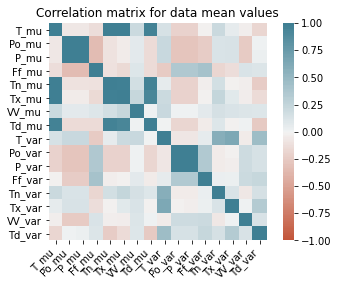

In [3]:
# Plot correlation matrix of the mean values to show strength and
# direction of the linear relationship between two variables
corr = X_train.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation matrix for data mean values')
plt.show()

In [4]:
# Prepare data for PCA (Principal component Analysis)
# for dimension reduction 
train_values = X_train.values
# Scale the data
scaler = StandardScaler()
train_values_scaled = scaler.fit_transform(train_values)

In [5]:
# PCA with all 16 components
pca_16 = PCA(n_components=16, random_state=2020)
pca_16.fit(train_values_scaled)

PCA(n_components=16, random_state=2020)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

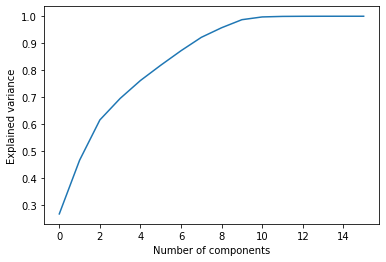

In [6]:
# Plot PCA analysis
plt.plot(np.cumsum(pca_16.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.plot

In [8]:
# Print PCA results 
print("Variance explained by: \n")
print("The sixth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[5])
print("The seventh principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[6])
print("The eighth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[7])
print("The ninth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[8])
print("The tenth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[9])

Variance explained by: 

The sixth principal component: 81.87234745577402
The seventh principal component: 87.24842193446986
The eighth principal component: 92.19592759796305
The ninth principal component: 95.74844420579845
The tenth principal component: 98.72476986777771


In [9]:
# We can see that 8 principal components keep over 92% of the 
# variability in the dataset while reducing 8 features in the dataset
# the remaining 8 features only contain less than 8% of the variability
# in data

In [10]:
# Lets reduce the training data accordingly to only use 3
# principal components
pca_8 = PCA(n_components=8)
X_train_8 = pca_8.fit_transform(train_values_scaled)

Text(0.5, 1.0, 'Transformed data by the principal components (90% variability)')

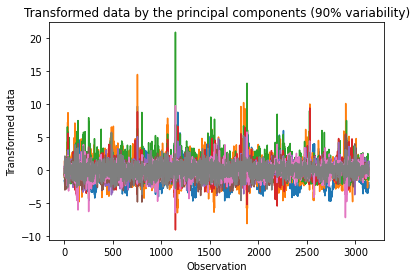

In [11]:
# Plot the data
plt.plot(X_train_8)
plt.xlabel('Observation')
plt.ylabel('Transformed data')
plt.title('Transformed data by the principal components (90% variability)')

In [12]:
test_values = X_test.values
# Scale the data
test_values_scaled = scaler.transform(test_values)
# Apply PCA
X_test_8 = pca_8.transform(test_values_scaled)

In [13]:
# Predict future humidity using Linear Regression
# and the 4 principal components

# Set up model
reg = LinearRegression()
# Fit data 
reg.fit(X_train_8, y_train)
# Make a prediction
y_prediction = reg.predict(X_test_8)
# Show MSE and r2_score error
print(mean_squared_error(y_test, y_prediction))
print(r2_score(y_test, y_prediction))

71.01218243883369
0.5613127477395563


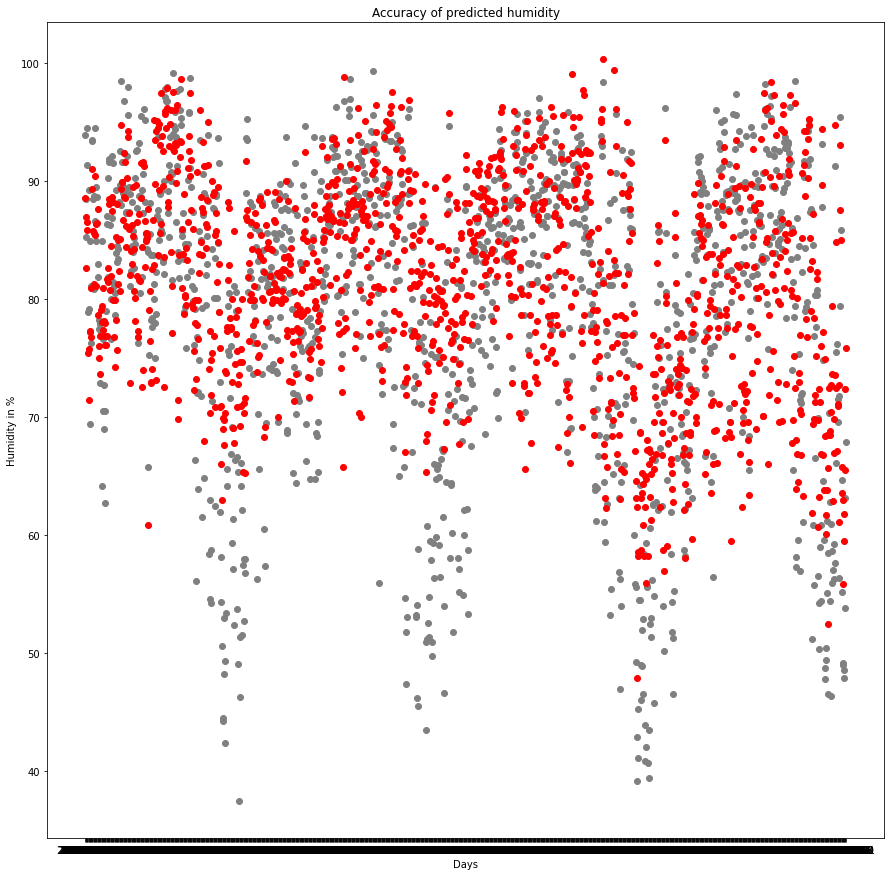

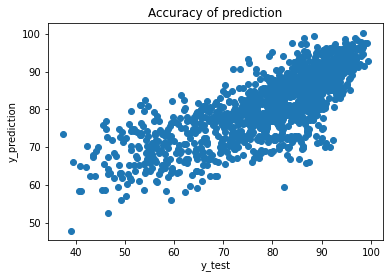

In [14]:
#defining the scatterplot for the predicted and actual humidity
plt.figure(figsize=(15,15))
plt.title('Accuracy of predicted humidity')
plt.ylabel('Humidity in %')
plt.xlabel('Days')
plt.scatter(X_test.index, y_test,  color='gray')
plt.scatter(X_test.index, y_prediction, color='red')
plt.show()

#plotting the accuracy of the prediction
plt.title('Accuracy of prediction')
plt.ylabel('y_prediction')
plt.xlabel('y_test')
plt.scatter(y_test, y_prediction)
plt.show()